### <b> Car Price Prediction </b>

### About Dataset


| Column Name      | Description                                                                   
|------------------|-------------------------------------------------------------------------------|
| Car_ID           | Unique id of each observation                                                 
| Symboling        | Assigned insurance risk rating. +3 indicates high risk, -3 indicates low risk |
| carCompany       | Name of the car company                                                        | 
| fueltype         | Type of fuel used in the car (gas or diesel)                                   | 
| aspiration       | Type of aspiration system used in the car                                      | 
| doornumber       | Number of doors in the car                                                     | 
| carbody          | Type of body of the car                                                        | 
| drivewheel       | Type of drive wheel                                                            | 
| enginelocation   | Location of car engine                                                         | 
| wheelbase        | Wheelbase of the car                                                           
| carlength        | Length of the car                                                              
| carwidth         | Width of the car                                                               
| carheight        | Height of the car                                                               
| curbweight       | Weight of the car without occupants or baggage                                
| enginetype       | Type of engine                                                                 | 
| cylindernumber   | Number of cylinders in the car                                                  | 
| enginesize       | Size of the car                                                                 
| fuelsystem       | Fuel system of the car                                                          | 
| boreratio        | Bore ratio of the car                                                           
| stroke           | Stroke or volume inside the engine                                              
| compressionratio | Compression ratio of the car                                                    
| horsepower       | Horsepower of the car                                                           
| peakrpm          | Peak revolutions per minute of the car                                          
| citympg          | Mileage in city                                                                 
| highwaympg       | Mileage on highway                                                              
| price            | Price of the car (dependent variable)                                          


#### <b> Importing the Dependencies </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#model selection, metrics and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [2]:
#loading the data
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#displaying the  first 5 rows
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#displaying the column names
car_data.columns, print('Total Number of Columns', len(car_data.columns)), print('Total Number of Rows:', car_data.shape[0])

Total Number of Columns 26
Total Number of Rows: 205


(Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
        'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'price'],
       dtype='object'),
 None,
 None)

In [5]:
#other necessary inforamtion
display(

    pd.DataFrame({
        'Features': car_data.columns,
        'Data-Type': [car_data[col].dtype for col in  car_data],
        'Number of Unique Values': [len(car_data[col].unique()) for col in car_data],
        'Duplicate Values': [car_data.duplicated().sum() for col in car_data.columns],
        'Null values': [car_data[col].isnull().sum() for col in car_data],
        'Precentage of Null values': [(car_data[col].isnull().sum())/len(car_data) for col in car_data],

    })
)

,Features,Data-Type,Number of Unique Values,Duplicate Values,Null values,Precentage of Null values
0,car_ID,int64,205,0,0,0.0
1,symboling,int64,6,0,0,0.0
2,CarName,object,147,0,0,0.0
3,fueltype,object,2,0,0,0.0
4,aspiration,object,2,0,0,0.0
5,doornumber,object,2,0,0,0.0
6,carbody,object,5,0,0,0.0
7,drivewheel,object,3,0,0,0.0
8,enginelocation,object,2,0,0,0.0
9,wheelbase,float64,53,0,0,0.0


#### <b> Exploratory Data Analysis </b>

In [6]:
#general information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#statistical information
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#dropping the car_ID
car_data.drop('car_ID', inplace=True, axis=1)

In [9]:
#displaying the first 5 rows
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#displaying the unqiue values in doornumber and cylindernumber
print('Unique Values in Door Number',car_data['doornumber'].unique()), print('Unique Values in Cylinder Number',car_data['cylindernumber'].unique())

Unique Values in Door Number ['two' 'four']
Unique Values in Cylinder Number ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


(None, None)

In [11]:
#mapping the categorical representation of nunmbers to the digital representation
def convert_doorNumber(no):
    if no == 'two':
        return 2
    elif no == 'four':
        return 4
    else:
        raise ValueError(f"Unexpected door number: {no}")

def convert_cylindernumber(no):
    if no == 'four':
        return 4
    elif no == 'six':
        return 6
    elif no == 'five':
        return 5
    elif no == 'three':
        return 3
    elif no == 'twelve':
        return 12
    elif no == 'two':
        return 2
    elif no == 'eight':
        return 8
    else:
        raise ValueError(f"Unexpected cylinder number: {no}")


In [12]:
#converting to the right datatype
car_data['doornumber'] = car_data['doornumber'].apply(convert_doorNumber).astype(int)
car_data['cylindernumber'] = car_data['cylindernumber'].apply(convert_cylindernumber).astype(int)

In [13]:
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
#checking the carName column
car_data['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [15]:
#dropping the carName clumn
car_data.drop('CarName', inplace=True, axis=1)

In [16]:
#selecting the categorical variables
#categorical_columns =[cat_cols for cat_cols in car_data if car_data[cat_cols].dtype == 'O']

categorical_columns = car_data.select_dtypes(include=['object'])
column_names = categorical_columns.columns

##### <b> Univariate Data Analysis </b>

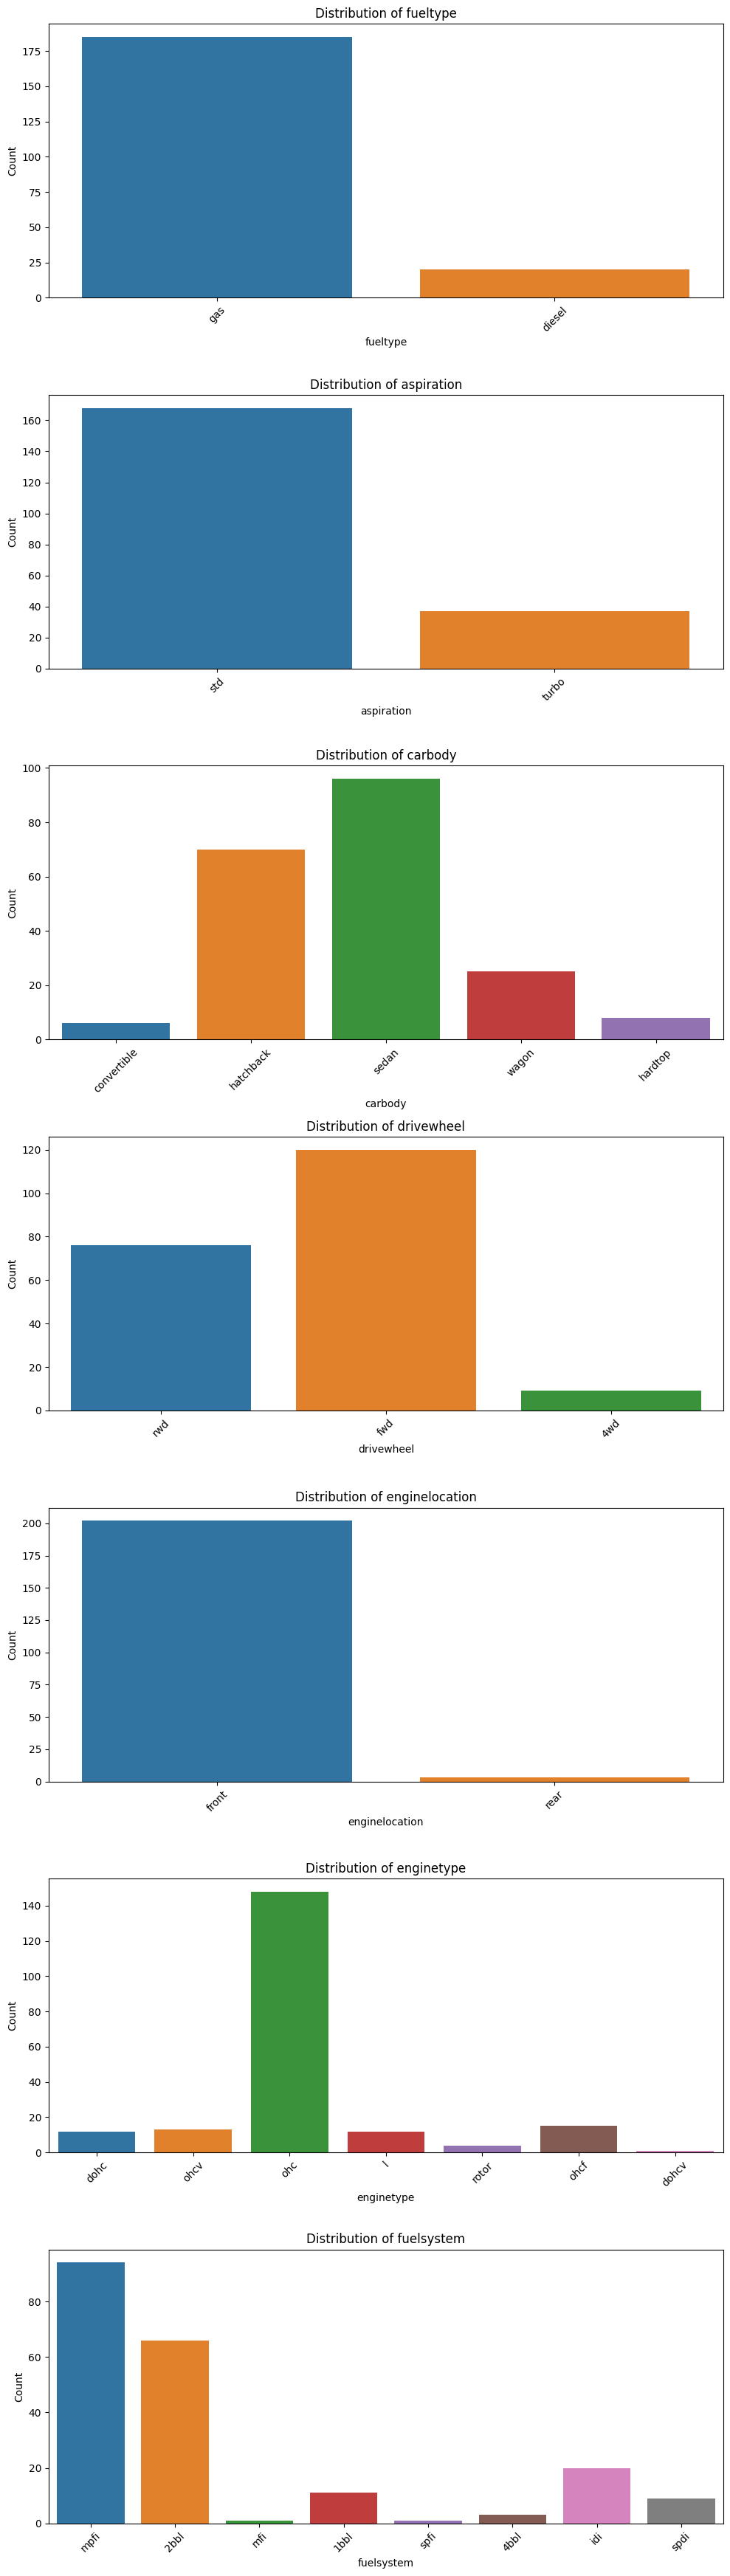

In [98]:
fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(10, len(column_names)*5))

for i, column in enumerate(column_names):
    sns.countplot(x=column, data=car_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Observation:
1. We need to inspect the fuelsystem column and enginetype column in order to balance it

In [17]:
#getting the value counts for each fuelsystem
fuel_sys =car_data['fuelsystem'].value_counts()

#creating a data frame
pd.DataFrame({
    'Fuel System':fuel_sys.index, 
    'Count':fuel_sys.values
})

,Fuel System,Count
0,mpfi,94
1,2bbl,66
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


In [18]:
#merging data together
def merge_fuel_sys(col):

    if col in ['1bbl', '4bbl', '2bbl']:
        return 'bbl'
    elif col in ['spdi', 'idi']:
        return 'idi'
    elif col in ['mfi', 'spfi', 'mpfi']:
        return 'fi(Any)'
    else:
        return 'Others'


In [19]:
#applying the function
car_data['fuelsystem']= car_data['fuelsystem'].apply(merge_fuel_sys)
car_data['fuelsystem'].value_counts()

fuelsystem
fi(Any)    96
bbl        80
idi        29
Name: count, dtype: int64

In [20]:
#getting the value counts for each enginetype
engine_type = car_data['enginetype'].value_counts()

#creating a data frame
pd.DataFrame({
    'Type': engine_type.index,
    'Count': engine_type.values
})

,Type,Count
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


In [21]:
#merging the rows in the dataframe
def merge_engine_type(type):

    if type == 'dohcv':
        return 'ohcv'
    if type == 'rotor':
        return 'l'
    else:
        return type

In [22]:
car_data['enginetype'] = car_data['enginetype'].apply(merge_engine_type)
car_data['enginetype'].value_counts()

enginetype
ohc     148
l        16
ohcf     15
ohcv     14
dohc     12
Name: count, dtype: int64

In [23]:
#dropping the symboling column
car_data.drop('symboling', axis=1, inplace=True)

In [24]:
#displaying the first 5 rows
car_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,fi(Any),3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,fi(Any),3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,fi(Any),2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,fi(Any),3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,fi(Any),3.19,3.40,8.0,115,5500,18,22,17450.0


#### <b> Bivariate Analysis </b>

In [25]:
#selecting the numerical columns
numerical_columns = car_data.select_dtypes(include=np.number)

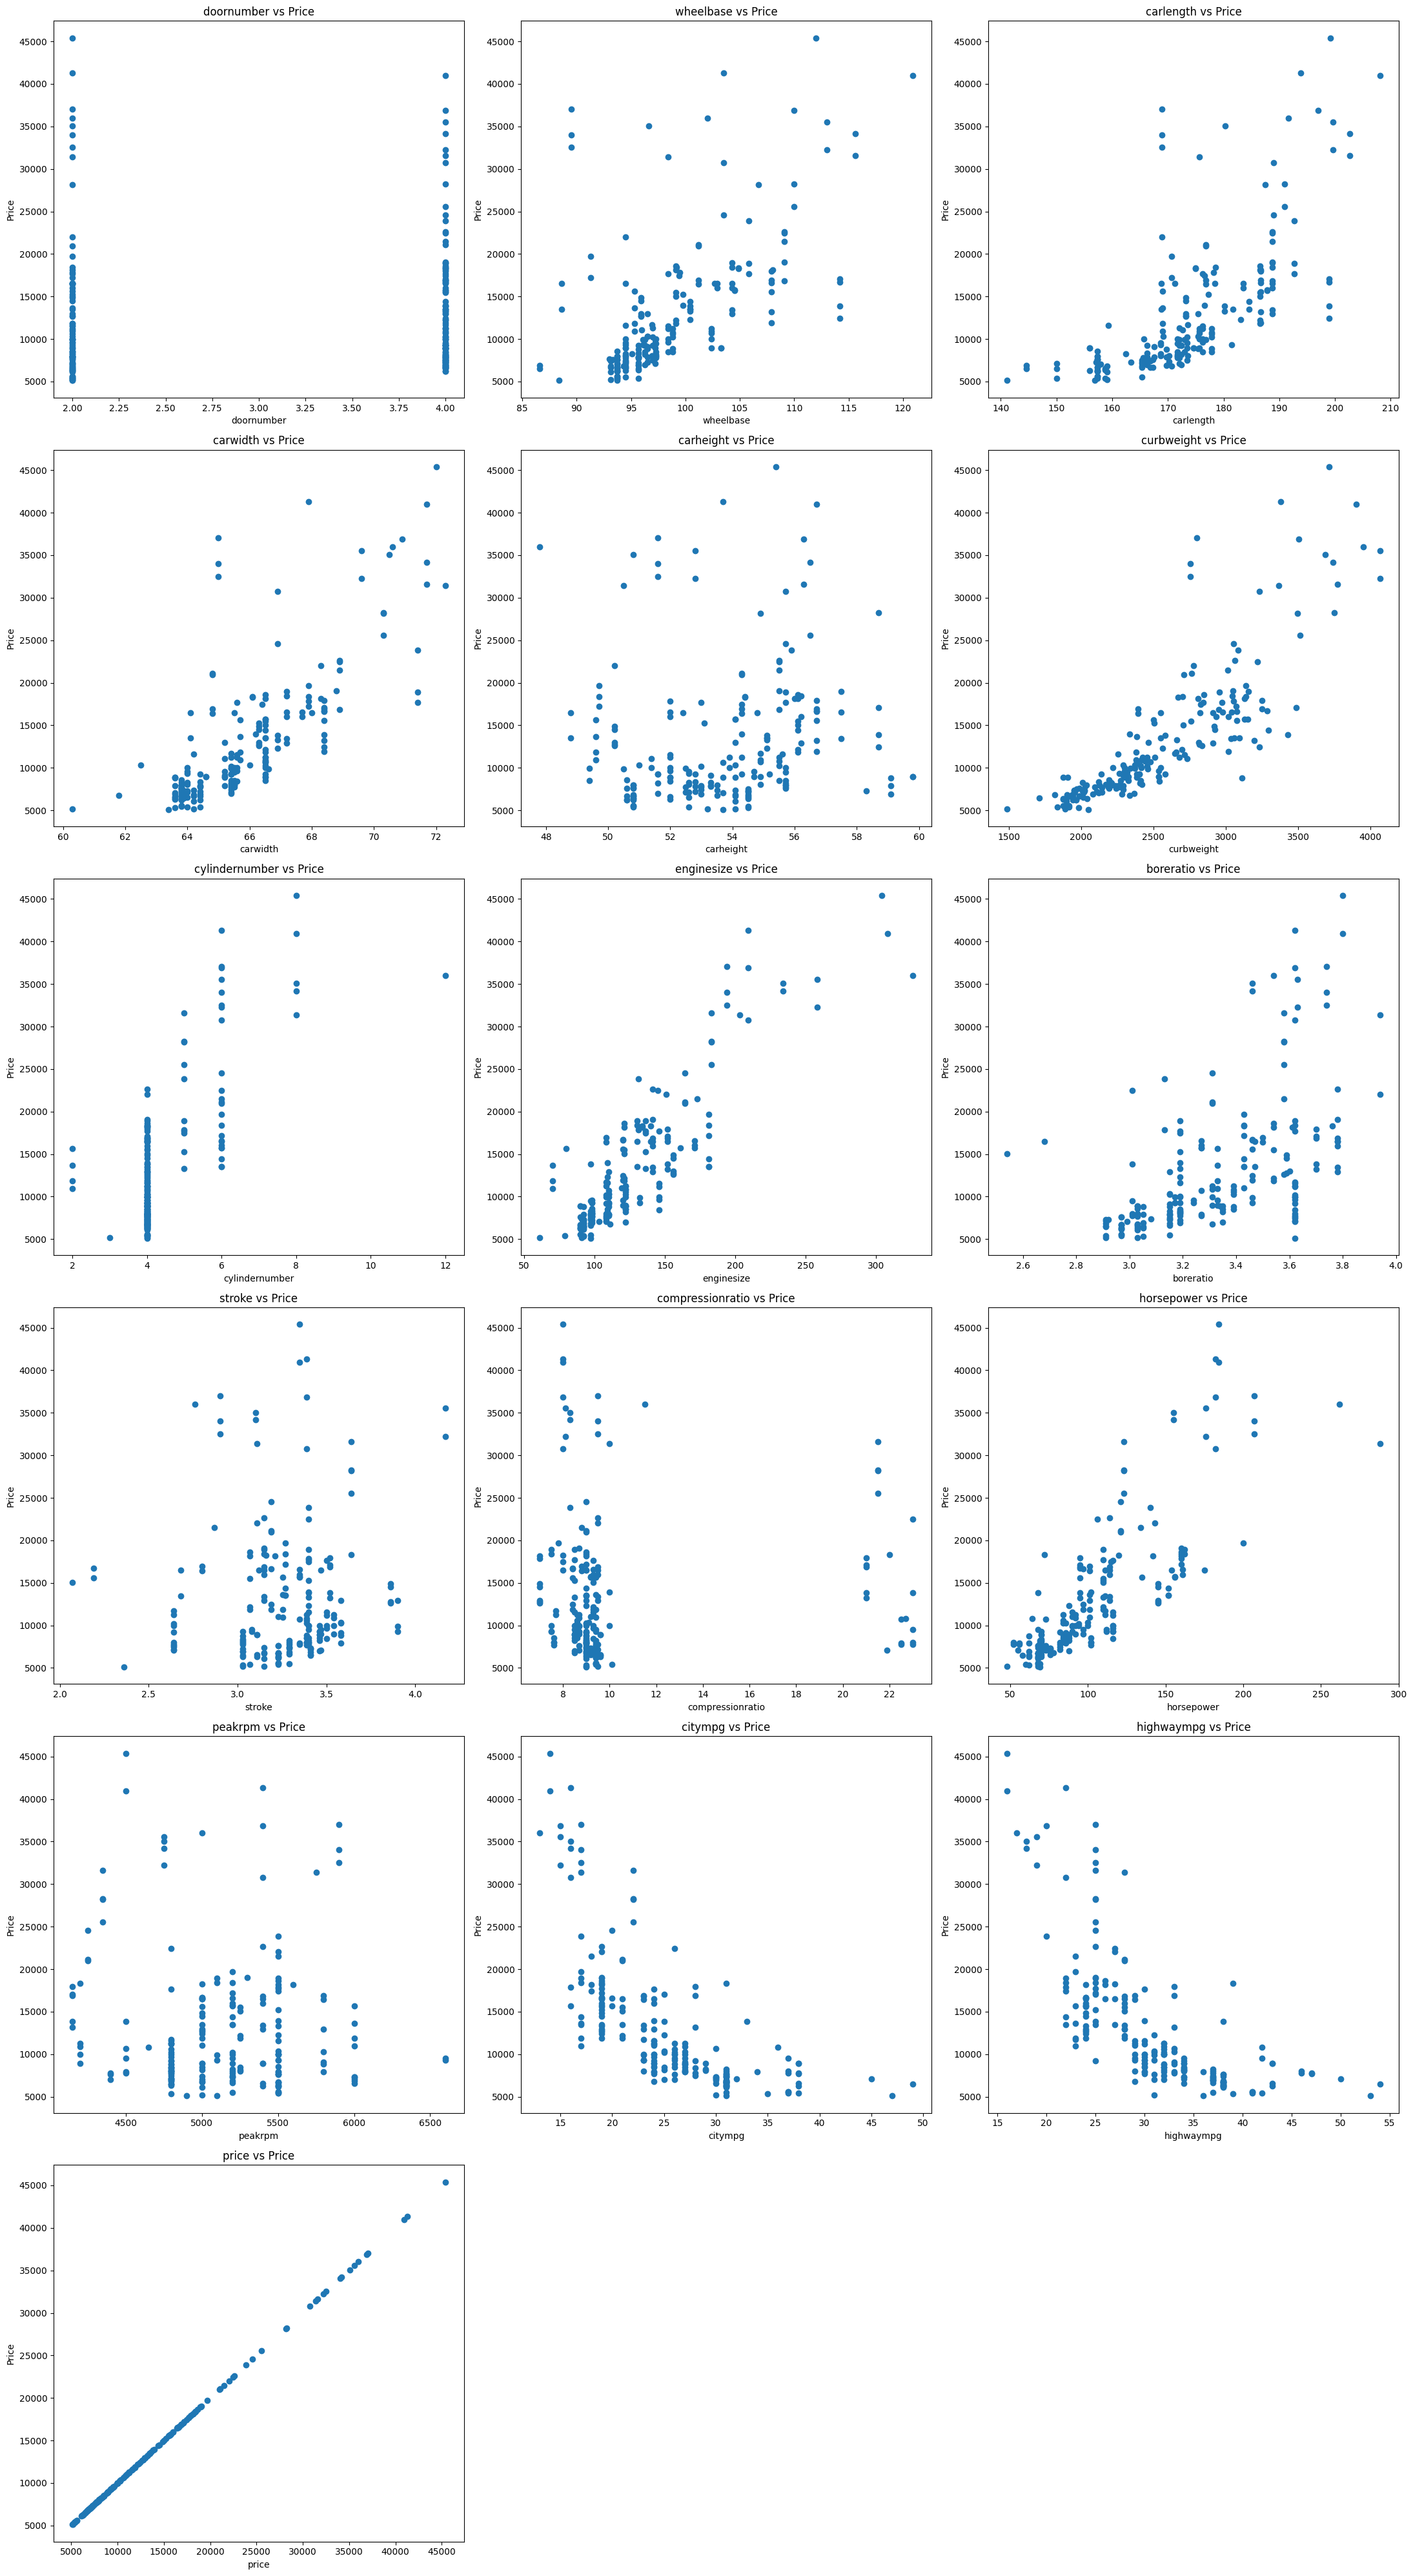

In [169]:
# Number of numerical columns
num_cols = len(numerical_columns.columns)

# Number of rows and columns for subplots
num_rows = num_cols // 3 + num_cols % 3
num_cols_per_row = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(22, 40))

# Flatten the axes if there is only one row
if num_rows == 1:
    axes = np.array([axes])

# Iterate through numerical columns and create scatter plots
for i, col in enumerate(numerical_columns.columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    axes[row_index, col_index].scatter(car_data[col], car_data['price'])
    axes[row_index, col_index].set_title(f'{str(col)} vs Price')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Price')

# Remove any unused subplots
for i in range(num_cols, num_rows * num_cols_per_row):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    fig.delaxes(axes[row_index, col_index])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Observations:
1. From the scatterplot above it does not look like doornumber has any important relationship with price at all
2. Highwaympg and citympg it simply looks like they are doing the samethijng in-terms iof i relationship with Price

In [182]:
car_data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,4,130,fi(Any),3.47,2.68,9.0,111,5000,27,13495.0
1,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,4,130,fi(Any),3.47,2.68,9.0,111,5000,27,16500.0
2,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,6,152,fi(Any),2.68,3.47,9.0,154,5000,26,16500.0
3,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,4,109,fi(Any),3.19,3.40,10.0,102,5500,30,13950.0
4,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,5,136,fi(Any),3.19,3.40,8.0,115,5500,22,17450.0


##### <b> Feature Engineering </b>

In [26]:
car_data['car_volume'] = car_data['carlength'] * car_data['carwidth'] * car_data['carheight']
car_data['average_mpg'] = (car_data['citympg'] + car_data['highwaympg']) / 2

In [27]:
# Drop the original 'citympg', 'highwaympg', 'carlength', 'carwidth', and  'carheight' columns
car_data.drop(['citympg', 'highwaympg', 'carlength', 'carwidth', 'carheight'], axis=1, inplace=True)


In [28]:
#selecting categorical columns
categorical_columns = car_data.select_dtypes(include=['object'])
[categorical_columns[col].unique() for col in categorical_columns]

[array(['gas', 'diesel'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 array(['rwd', 'fwd', '4wd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object),
 array(['fi(Any)', 'bbl', 'idi'], dtype=object)]

#### <b> Encoding categroical data </b>

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
#instance of the encoder
label_encoder = LabelEncoder()

#encoding the categorical data
for col in categorical_columns:
    car_data[col]= label_encoder.fit_transform(car_data[col])

### <b>Correlation Heat-Map Matrix </b>

In [308]:
#getting the correlation
car_data.corr(numeric_only=True)['price']

fueltype           -0.105679
aspiration          0.177926
doornumber          0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
wheelbase           0.577816
curbweight          0.835305
enginetype          0.165368
cylindernumber      0.718305
enginesize          0.874145
fuelsystem          0.428367
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
price               1.000000
car_volume          0.624339
average_mpg        -0.696835
Name: price, dtype: float64

<Axes: >

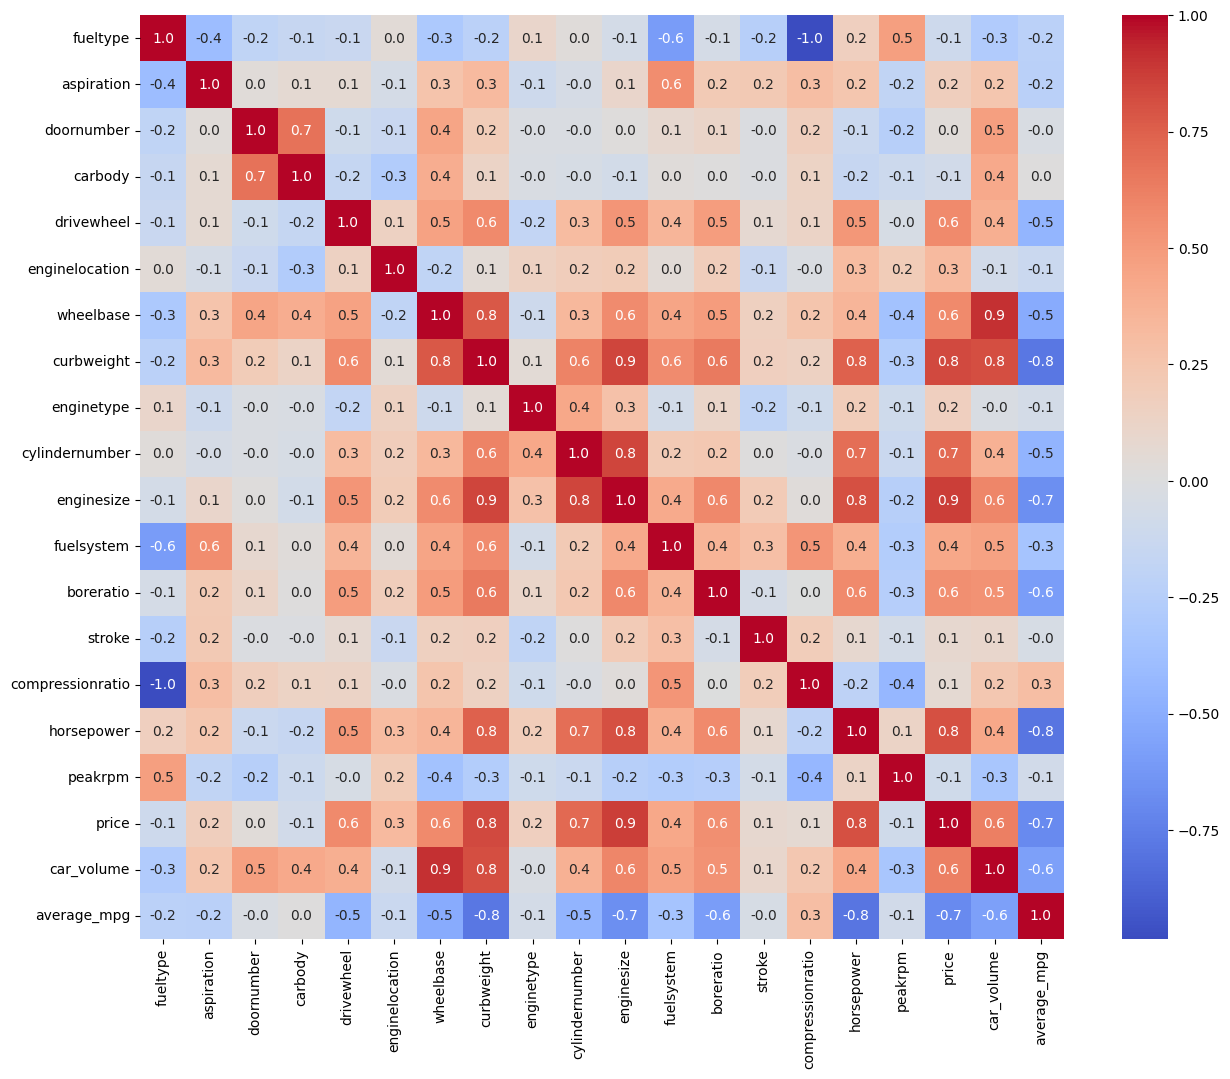

In [309]:
#displaying the correlation heat map
plt.figure(figsize=(15,12))
sns.heatmap(
    car_data.corr(numeric_only=True),
    annot=True,
    fmt='.1f',
    square=True,
    cmap='coolwarm'
)

In [310]:
car_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,average_mpg
0,1,0,2,0,2,0,88.6,2548,0,4,130,1,3.47,2.68,9.0,111,5000,13495.0,528019.904,24.0
1,1,0,2,0,2,0,88.6,2548,0,4,130,1,3.47,2.68,9.0,111,5000,16500.0,528019.904,24.0
2,1,0,2,2,2,0,94.5,2823,4,6,152,1,2.68,3.47,9.0,154,5000,16500.0,587592.640,22.5
3,1,0,4,3,1,0,99.8,2337,2,4,109,1,3.19,3.40,10.0,102,5500,13950.0,634816.956,27.0
4,1,0,4,3,0,0,99.4,2824,2,5,136,1,3.19,3.40,8.0,115,5500,17450.0,636734.832,20.0


#### <b> Feature Selection </b>

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
X= car_data.drop('price', axis=1)
y= car_data['price']

In [34]:
# Calculate Mutual Information Regression score
mi_scores = mutual_info_regression(X, y)

# Display the scores for each feature
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, Mutual Information Regression Score: {mi_scores[i]}")

Feature: fueltype, Mutual Information Regression Score: 0.036031323277077476
Feature: aspiration, Mutual Information Regression Score: 0.09713891474394676
Feature: doornumber, Mutual Information Regression Score: 0.0
Feature: carbody, Mutual Information Regression Score: 0.034324492726280464
Feature: drivewheel, Mutual Information Regression Score: 0.33252557321081255
Feature: enginelocation, Mutual Information Regression Score: 0.003586682780765682
Feature: wheelbase, Mutual Information Regression Score: 0.5669394459734782
Feature: curbweight, Mutual Information Regression Score: 0.8606054697570533
Feature: enginetype, Mutual Information Regression Score: 0.165045307136515
Feature: cylindernumber, Mutual Information Regression Score: 0.34023295429868106
Feature: enginesize, Mutual Information Regression Score: 0.8162853867909114
Feature: fuelsystem, Mutual Information Regression Score: 0.464393068091828
Feature: boreratio, Mutual Information Regression Score: 0.4751905296446677
Featur

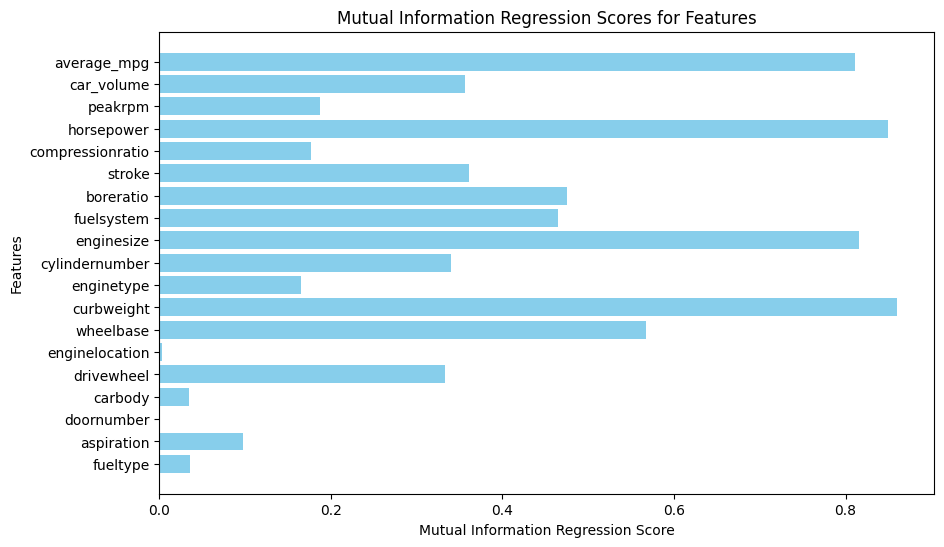

In [35]:
# Plot Mutual Information Regression scores
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi_scores, color='skyblue')
plt.xlabel('Mutual Information Regression Score')
plt.ylabel('Features')
plt.title('Mutual Information Regression Scores for Features')
plt.show()

Observations:
1. From the mutual information regression score it is safe to drop the doornumber and enginelocation columns

In [36]:
X= X.drop(columns=['doornumber', 'enginelocation'], axis=1)

#### <b> Data Splitting </b>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#### <b>Scaling the data</b>

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### <b>Model Selection </b>

In [68]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(C=100, kernel='linear'),
    'RandomForestRegressor': RandomForestRegressor(),
    'Xgboost': XGBRegressor(),
    'Catboost': CatBoostRegressor(verbose=False)
    
}

In [69]:
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred =model.predict(X_test)

    rmse = mean_squared_error(y_pred, y_test, squared=False)
    r2 = r2_score(y_pred, y_test)


    print('Name',name)
    print('Root Mean Squared error',rmse)
    print('R2 Score',r2)
    print('--'*20)



Name LinearRegression
Root Mean Squared error 3751.04422709132
R2 Score 0.7523869409705879
----------------------------------------
Name Lasso Regression
Root Mean Squared error 3752.077741396856
R2 Score 0.752118143829535
----------------------------------------
Name Ridge Regression
Root Mean Squared error 3783.278821856467
R2 Score 0.7482878351322717
----------------------------------------
Name DecisionTreeRegressor
Root Mean Squared error 3663.6414390599543
R2 Score 0.8177508842853395
----------------------------------------
Name SVR
Root Mean Squared error 4249.07813206177
R2 Score 0.5324235434784319
----------------------------------------
Name RandomForestRegressor
Root Mean Squared error 3079.3405385616293
R2 Score 0.854489530299278
----------------------------------------
Name Xgboost
Root Mean Squared error 3259.3986150607816
R2 Score 0.8406171330077568
----------------------------------------
Name Catboost
Root Mean Squared error 2429.1269631458063
R2 Score 0.90007721007416

Observations:
1. The Random Forest and Catboost Model performs the best in-terms of Root Mean Squared Error that is the square root between of the difference between the actual and predicted values for car prices and R2 score the coefficient of determination between the variance of the dependent variable and independent varible

### <b>Model Fine Tuning</b>

In [406]:
from sklearn.model_selection import GridSearchCV

<b>1. CatBoost Model </b>

In [407]:
cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [410]:
cat_grid_search = GridSearchCV(CatBoostRegressor(verbose=False), cat_param_grid, scoring='r2', cv=5)
cat_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A910F41B70>,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3]},
             scoring='r2')

In [414]:
# Print the best parameters and best score
print('CatBoost Regressor')
print("Best parameters found: ", cat_grid_search.best_params_)
print("Best R2 found: ", cat_grid_search.best_score_)

CatBoost Regressor
Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.3}
Best R2 found:  0.9122397561310829


<b>2. Random Forest Model </b>

In [412]:
rf_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': [2,5,10],
    'min_samples_leaf':[3,4,5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators':[10,20,30,40,50]
}

In [413]:
rf_grid_search = GridSearchCV(RandomForestRegressor(verbose=False), rf_param_grid, scoring='r2', cv=5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(verbose=False),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': [2, 5, 10],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [415]:
# Print the best parameters and best score
print('Random Forest Regressor')
print("Best parameters found: ", rf_grid_search.best_params_)
print("Best R2 found: ", rf_grid_search.best_score_)

Random Forest Regressor
Best parameters found:  {'bootstrap': False, 'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10}
Best R2 found:  0.9116545215504619


Observation:
1. From the GridSearchCV hyper parameters tunning the CatBoost Regressor Model Still performed slightly better than the Random Forest Regressor in terms of R2 score

In [39]:
final_model = CatBoostRegressor(
    verbose=False,
    depth=4,
    learning_rate=0.3,
    l2_leaf_reg=3,
    iterations=200
)

#training the model
final_model.fit(X_train, y_train)

In [40]:
#making predictions
prediction=final_model.predict(X_test)

#### <b> Plotting the Actual and Predicted Values Together </b>

In [41]:
#turning the actual values to list
Y_test = list(y_test)

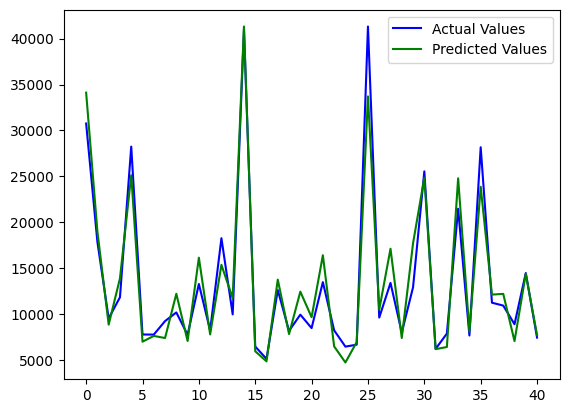

In [42]:
#plottign a line plot of the actual and predicted values
plt.plot(Y_test, color='blue', label='Actual Values')
plt.plot(prediction, color='Green', label='Predicted Values')

#showing the legend
plt.legend()
#displaying the plot
plt.show()

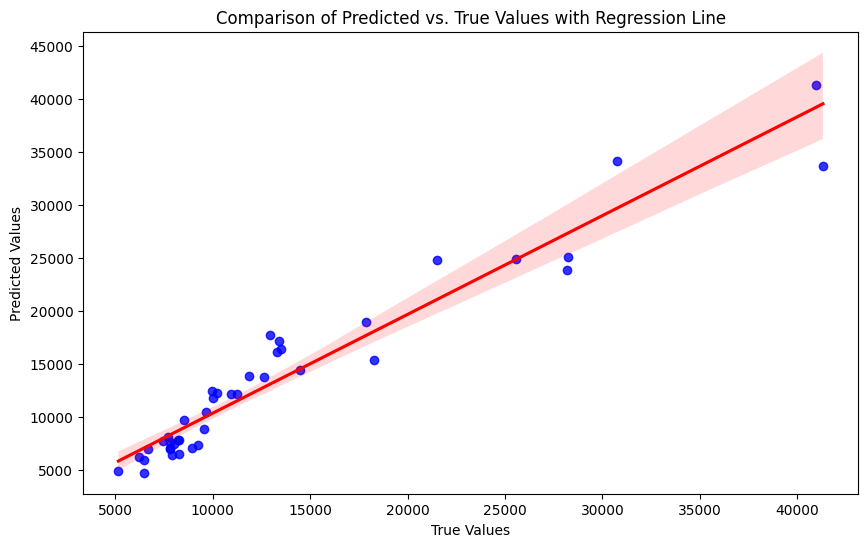

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=prediction, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs. True Values with Regression Line')
plt.show()

In [425]:
#saving the model
import joblib

joblib.dump(final_model, 'car_pre_prediction.joblib')

['car_pre_prediction.joblib']

### <b> THE END </b>